# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Abrar
- **Email:** aulia_abrar@yahoo.com
- **ID Dicoding:** abrar_qYRa

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Pada musim apa penyewaan sepeda paling banyak, dan pada musim apa penyewaan sepeda paling sedikit
- Pertanyaan 2: Bagaimana perbandingan persentase penyewaan sepeda pada hari kerja (workingday=Yes) dengan pada hari libur (workingday=No)
- Pertanyaan 3: Pada jam berapa penyewaan sepeda paling banyak, dan pada jam berapa penyewaan sepeda paling sedikit
- Pertanyaan 4: Bagaimana kinerja penyewaan sepeda selama tahun 2011 hingga tahun 2012

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data pada tabel day_df merupakan data jumlah 'bike sharing' per hari
- Data pada tabel hour_df merupakan data jumlah 'bike sharing' per jam

### Assessing Data

#### Menilai tabel day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel hour_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Kolom pada tabel day_df berjumlah 16
- Kolom pada tabel hour_df berjumlah 17 (adanya penambahan kolom 'hr')
- Tipe data pada tabel day_df terdiri dari float64 sebanyak 4 kolom, int64 sebanyak 11 kolom dan object sebanyak 1 kolom
- Tipe data pada tabel hour_df terdiri dari float64 sebanyak 4 kolom, int64 sebanyak 12 kolom dan object sebanyak 1 kolom
- Tidak terdapat missing values, tidak ada data duplikat dan tidak terdapat keanehan data pada tabel day_df
- Juga tidak terdapat missing values, tidak ada data duplikat dan tidak terdapat keanehan data pada tabel hour_df

### Cleaning Data

- Mengganti nama kolom agar lebih mudah dibaca

In [12]:
day_df.rename(columns={"dteday":"date", "yr":"year", "mnth":"month", "hr":"hour", "weathersit":"weather_situation", "cnt":"count_bs"},inplace=True)
hour_df.rename(columns={"dteday":"date", "yr":"year", "mnth":"month", "hr":"hour", "weathersit":"weather_situation", "cnt":"count_bs"},inplace=True)

- Merubah tipe data 'date' dari 'object' menjadi 'datetime'

In [13]:
day_df["date"] = pd.to_datetime(day_df["date"])
hour_df["date"] = pd.to_datetime(hour_df["date"])

- Mengkonversi data 'season' menjadi 1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'

In [14]:
day_df.replace({"season": {1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"}}, inplace=True)
hour_df.replace({"season": {1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"}}, inplace=True)

- Mengkonversi data 'year' menjadi 0:2011, 1:2012

In [15]:
day_df.replace({"year": {0:2011, 1:2012}}, inplace=True)
hour_df.replace({"year": {0:2011, 1:2012}}, inplace=True)

- Mengkonversi data 'month' menjadi 1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'Mei', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Okt', 11:'Nov', 12:'Dec'

In [16]:
day_df.replace({"month": {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"Mei", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Okt", 11:"Nov", 12:"Dec"}}, inplace=True)
hour_df.replace({"month": {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"Mei", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Okt", 11:"Nov", 12:"Dec"}}, inplace=True)

- Mengkonversi data 'holiday' menjadi 0:"No", 1:"Yes"

In [17]:
day_df.replace({"holiday": {0:"No", 1:"Yes"}}, inplace=True)
hour_df.replace({"holiday": {0:"No", 1:"Yes"}}, inplace=True)

- Mengkonversi data 'weekday' menjadi 0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'

In [18]:
day_df.replace({"weekday": {0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"}}, inplace=True)
hour_df.replace({"weekday": {0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"}}, inplace=True)

- Mengkonversi data 'workingday' menjadi 0:"No", 1:"Yes"

In [19]:
day_df.replace({"workingday": {0:"No", 1:"Yes"}}, inplace=True)
hour_df.replace({"workingday": {0:"No", 1:"Yes"}}, inplace=True)

- Mengkonversi data 'weather_situation' menjadi 1:'Clear', 2:'Mist', 3:'Light_Rain', 4:'Heavy_Rain'

In [20]:
day_df.replace({"weather_situation": {1:"Clear", 2:"Mist", 3:"Light_Rain", 4:"Heavy_Rain"}}, inplace=True)
hour_df.replace({"weather_situation": {1:"Clear", 2:"Mist", 3:"Light_Rain", 4:"Heavy_Rain"}}, inplace=True)

- Memeriksa tabel day_df setelah proses cleaning

In [21]:
day_df.info()
day_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            731 non-null    int64         
 1   date               731 non-null    datetime64[ns]
 2   season             731 non-null    object        
 3   year               731 non-null    int64         
 4   month              731 non-null    object        
 5   holiday            731 non-null    object        
 6   weekday            731 non-null    object        
 7   workingday         731 non-null    object        
 8   weather_situation  731 non-null    object        
 9   temp               731 non-null    float64       
 10  atemp              731 non-null    float64       
 11  hum                731 non-null    float64       
 12  windspeed          731 non-null    float64       
 13  casual             731 non-null    int64         
 14  registered

,instant,date,season,year,month,holiday,weekday,workingday,weather_situation,temp,atemp,hum,windspeed,casual,registered,count_bs
0,1,2011-01-01,Spring,2011,Jan,No,Saturday,No,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,No,Sunday,No,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,No,Monday,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,No,Tuesday,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,No,Wednesday,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- Memeriksa tabel hour_df setelah proses cleaning

In [22]:
hour_df.info()
hour_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            17379 non-null  int64         
 1   date               17379 non-null  datetime64[ns]
 2   season             17379 non-null  object        
 3   year               17379 non-null  int64         
 4   month              17379 non-null  object        
 5   hour               17379 non-null  int64         
 6   holiday            17379 non-null  object        
 7   weekday            17379 non-null  object        
 8   workingday         17379 non-null  object        
 9   weather_situation  17379 non-null  object        
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  hum                17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather_situation,temp,atemp,hum,windspeed,casual,registered,count_bs
0,1,2011-01-01,Spring,2011,Jan,0,No,Saturday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Setelah proses cleaning data, terdapat perubahan beberapa nama kolom dan perubahan isi data pada tabel day_df dan perubahan isi data pada tabel hour_df
- Tipe data pada tabel day_df setelah perubahan menjadi terdiri dari datetime64 sebanyak 1 kolom, float64 sebanyak 4 kolom, int64 sebanyak 5 kolom dan object sebanyak 6 kolom
- Tipe data pada tabel hour_df setelah perubahan menjadi terdiri dari datetime64 sebanyak 1 kolom, float64 sebanyak 4 kolom, int64 sebanyak 6 kolom dan object sebanyak 6 kolom

## Exploratory Data Analysis (EDA)

### Explore data day_df

In [23]:
day_df.describe(include="all")

,instant,date,season,year,month,holiday,weekday,workingday,weather_situation,temp,atemp,hum,windspeed,casual,registered,count_bs
count,731.000000,731,731,731.000000,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,Jan,No,Saturday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- Total penyewaan sepeda selama tahun 2011 s/d 2012

In [24]:
print(f"Total penyewaan sepeda selama tahun {day_df.year.min()} s/d {day_df.year.max()} adalah sebanyak : {day_df.count_bs.sum()}")

Total penyewaan sepeda selama tahun 2011 s/d 2012 adalah sebanyak : 3292679


- Jumlah penyewaan sepeda per tahun

In [25]:
day_df.groupby(by="year").agg({
    "count_bs": ["sum"]
})

,count_bs
,sum
year,
2011,1243103
2012,2049576


- Jumlah penyewaan sepeda per musim

In [26]:
day_df.groupby(by="season").count_bs.sum().sort_values(ascending=False)

,count_bs
season,
Fall,1061129
Summer,918589
Winter,841613
Spring,471348


- Jumlah penyewaan sepeda per bulan

In [27]:
day_df.groupby(by="month").count_bs.sum().sort_values(ascending=True)

,count_bs
month,
Jan,134933
Feb,151352
Dec,211036
Mar,228920
Nov,254831
Apr,269094
Okt,322352
Mei,331686
Jul,344948


- Jumlah penyewaan sepeda berdasarkan 'workingday'

In [28]:
day_df.groupby(by="workingday").count_bs.sum().sort_values(ascending=True)

,count_bs
workingday,
No,1000269
Yes,2292410


- Jumlah penyewaan sepeda tertinggi per hari

In [29]:
day_df[day_df.count_bs == day_df.count_bs.max()]

,instant,date,season,year,month,holiday,weekday,workingday,weather_situation,temp,atemp,hum,windspeed,casual,registered,count_bs
623,624,2012-09-15,Fall,2012,Sep,No,Saturday,No,Clear,0.608333,0.585867,0.501667,0.247521,3160,5554,8714


- Jumlah penyewaan sepeda terendah per hari

In [30]:
day_df[day_df.count_bs == day_df.count_bs.min()]

,instant,date,season,year,month,holiday,weekday,workingday,weather_situation,temp,atemp,hum,windspeed,casual,registered,count_bs
667,668,2012-10-29,Winter,2012,Okt,No,Monday,Yes,Light_Rain,0.44,0.4394,0.88,0.3582,2,20,22


- Perbandingan data jumlah hari penyewaan sepeda berdasarkan jenis 'workingday'

In [31]:
day_df.groupby(by="workingday").instant.nunique().sort_values(ascending=True)

,instant
workingday,
No,231
Yes,500


### Explore data hour_df

In [32]:
hour_df.describe(include="all")

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather_situation,temp,atemp,hum,windspeed,casual,registered,count_bs
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,Mei,NaN,No,Saturday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


- Jumlah penyewaan sepeda per jam

In [33]:
hour_df.groupby(by="hour").agg({
    "count_bs": ["sum"]
})

,count_bs
,sum
hour,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


- Perbandingan data jumlah jam penyewaan sepeda berdasarkan jenis 'workingday'

In [34]:
hour_df.groupby(by="workingday").instant.nunique().sort_values(ascending=True)

,instant
workingday,
No,5514
Yes,11865


**Insight:**
- Jumlah penyewaan sepeda terbanyak adalah pada musim 'Fall' yaitu sebanyak 1061129 penyewaan, sementara jumlah penyewaan sepeda paling sedikit adalah pada musim 'Spring' yaitu sebanyak 471348 penyewaan
- Jumlah penyewaan sepeda terbanyak ternyata terdapat pada hari kerja (workingday=Yes) yaitu sebanyak 2292410 penyewaan, sementara pada bukan hari kerja (workingday=No) sebanyak 1000269 penyewaan
- Jumlah penyewaan sepeda paling banyak per hari terdapat pada hari libur 'Saturday' tanggal 15-09-2012 musim 'Fall' bulan September tahun 2012, sebanyak 8714 penyewaan
- Jumlah penyewaan sepeda paling sedikit per hari terdapat pada hari kerja 'Monday' tanggal 29-10-2012 musim 'Winter' bulan Oktober tahun 2012, sebanyak 22 penyewaan
- Jumlah penyewaan sepeda paling banyak per jam terdapat pada jam 17 sebanyak 336860 penyewaan, dan paling sedikit pada jam 4 sebanyak 4428 penyewaan

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apa penyewaan sepeda paling banyak, dan pada musim apa penyewaan sepeda paling sedikit

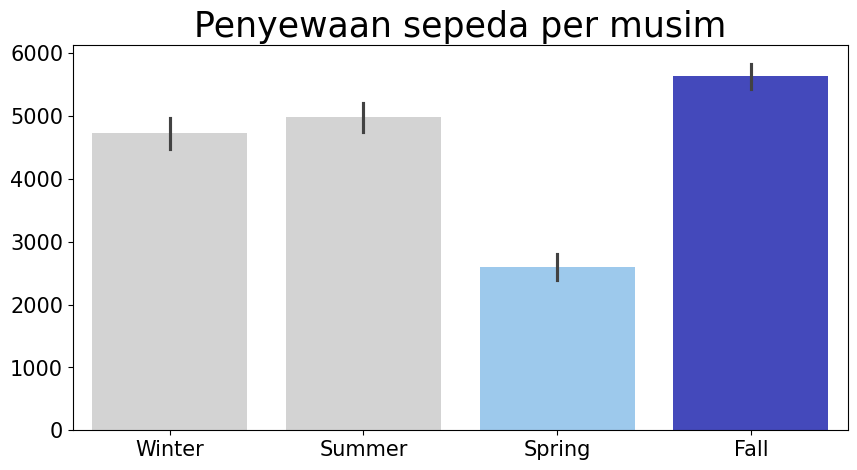

In [35]:
colors = ["#D3D3D3", "#D3D3D3", "#90CAF9", "#3037CF"]

fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(
        y="count_bs",
        x="season",
        data=day_df.sort_values(by="season", ascending=False),
        palette=colors,
        ax=ax,
        hue="season"
    )

ax.set_title("Penyewaan sepeda per musim", loc="center", fontsize=25)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.show()

### Pertanyaan 2: Bagaimana perbandingan persentase penyewaan sepeda pada hari kerja (workingday=Yes) dengan pada hari libur (workingday=No)

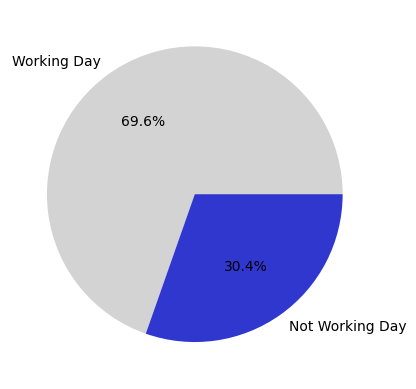

In [36]:
workingday_yes = day_df[day_df.workingday == "Yes"].count_bs.sum()
workingday_no = day_df[day_df.workingday == "No"].count_bs.sum()

data = [workingday_yes, workingday_no]
labels = ['Working Day', 'Not Working Day']

plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#D3D3D3", "#3037CF"])

plt.show()

### Pertanyaan 3: Pada jam berapa penyewaan sepeda paling banyak, dan pada jam berapa penyewaan sepeda paling sedikit

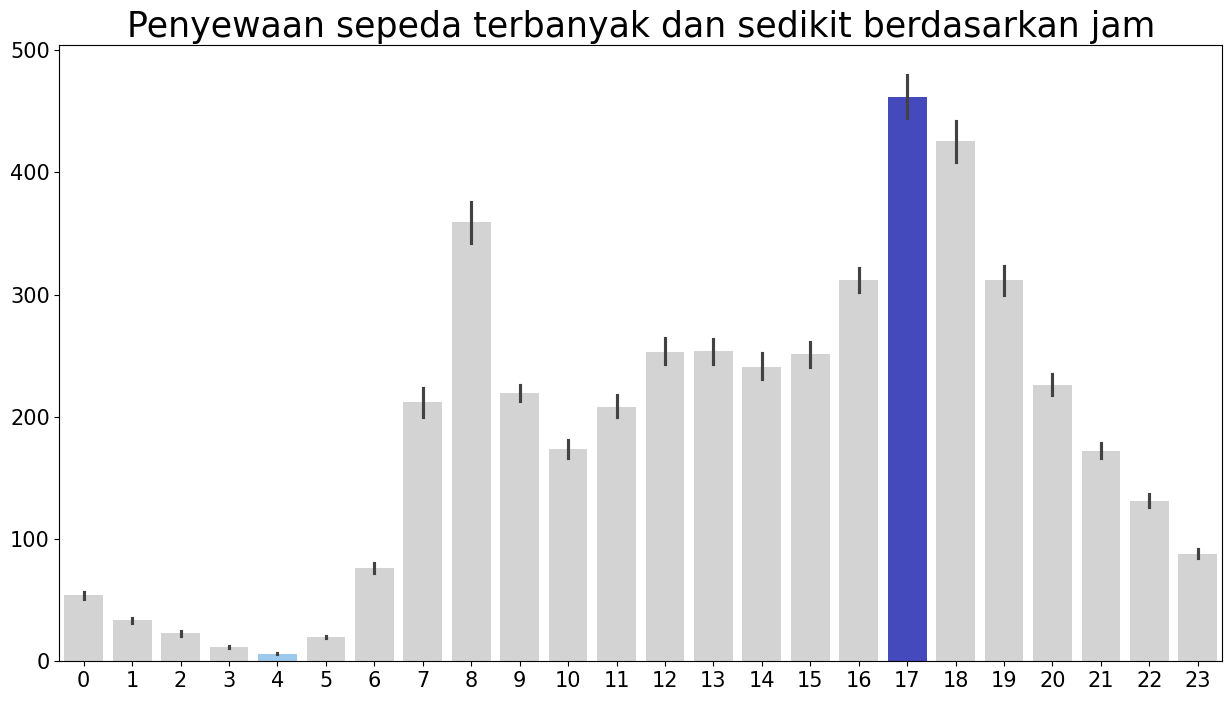

In [37]:
colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3",
          "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3",
          "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#3037CF",
          "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

fig, ax = plt.subplots(figsize=(15, 8))

sns.barplot(
        y="count_bs",
        x="hour",
        data=hour_df.sort_values(by="hour", ascending=False),
        palette=colors,
        ax=ax,
        hue="hour",
        legend=False
    )

ax.set_title("Penyewaan sepeda terbanyak dan sedikit berdasarkan jam", loc="center", fontsize=25)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.show()

### Pertanyaan 4: Bagaimana kinerja penyewaan sepeda selama tahun 2011 hingga tahun 2012

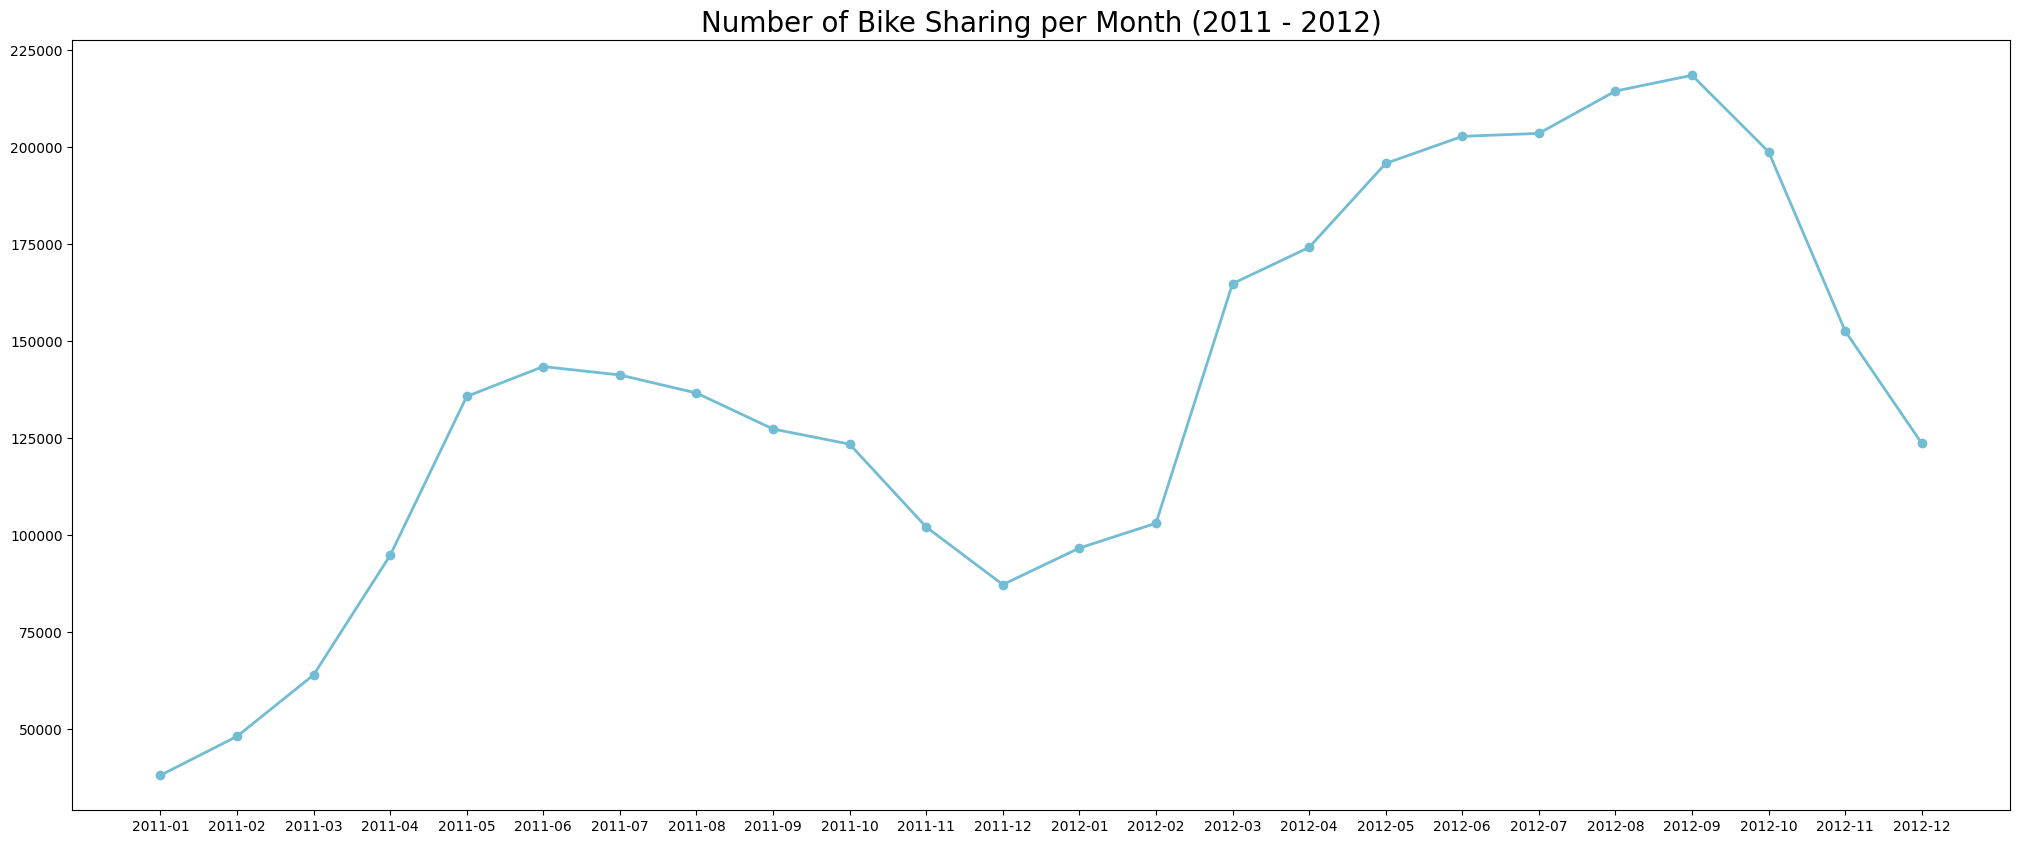

In [38]:
monthly_bs_df = day_df.resample(rule='ME', on='date').agg({
    "count_bs": "sum"
})
monthly_bs_df.index = monthly_bs_df.index.strftime('%Y-%m')
monthly_bs_df = monthly_bs_df.reset_index()
monthly_bs_df.rename(columns={
    "count_bs": "bike sharing"
}, inplace=True)

plt.figure(figsize=(25, 10))
plt.plot(monthly_bs_df["date"], monthly_bs_df["bike sharing"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Bike Sharing per Month (2011 - 2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Insight:**
- Jumlah penyewaan sepeda terbanyak adalah pada musim 'Fall', sementara jumlah penyewaan sepeda paling sedikit adalah pada musim 'Spring'
- Jumlah penyewaan sepeda terbanyak ternyata terdapat pada hari kerja (workingday=Yes) yaitu sebanyak 69,6%, sementara pada bukan hari kerja (workingday=No) sebanyak 30,4%
- Jumlah penyewaan sepeda paling banyak per jam terdapat pada jam 17, dan paling sedikit pada jam 4
- Secara umum, sepanjang tahun 2011 s/d 2012 terdapat kenaikan penyewaan sepeda. Kenaikan penyewaan sepeda pada tahun 2011 terlihat mulai bulan Mei hingga bulan Oktober, dan kenaikan penyewaan sepeda pada tahun 2012 terlihat mulai bulan Maret hingga bulan Oktober

## Analisis Lanjutan (Opsional)

### Analisis Clustering

- Jumlah penyewaan sepeda per tahun, musim, dan bulan

In [39]:
day_df.groupby(by=["year", "season", "month"]).agg({
    "casual": "sum",
    "registered": "sum",
    "count_bs": "sum"
})

casual  registered  count_bs
year season month                              
2011 Fall   Aug     28842      107849    136691
            Jul     36452      104889    141341
            Jun     10313       39413     49726
            Sep     19843       72049     91892
     Spring Dec      3153       19237     22390
            Feb      6242       41973     48215
            Jan      3073       35116     38189
            Mar      8957       32249     41206
     Summer Apr     22346       72524     94870
            Jun     20299       73487     93786
            Mar      3869       18970     22839
            Mei     31050      104771    135821
     Winter Dec      5295       59638     64933
            Nov     15594       86573    102167
            Okt     25222       98289    123511
            Sep      6702       28824     35526
2012 Fall   Aug     43197      171306    214503
            Jul     41705      161902    203607
            Jun     13448       52214     65662
            Sep     32291      125416    157707
     Spring Dec      3310       17298     20608
            Feb      8721       94416    103137
            Jan      8969       87775     96744
            Mar     18197       82662    100859
     Summer Apr     38456      135768    174224
            Jun     29846      107322    137168
            Mar     13421       50595     64016
            Mei     44235      151630    195865
     Winter Dec      9935       93170    103105
            Nov     21009      131655    152664
            Okt     34538      164303    198841
            Sep     11487       49379     60866

- Jumlah penyewaan sepeda berdasarkan workingday dan weekday, dengan rincian casual, registered dan count_bs

In [40]:
hour_df.groupby(by=["workingday", "weekday"]).agg({
    "casual": "sum",
    "registered": "sum",
    "count_bs": "sum"
})

casual  registered  count_bs
workingday weekday                                
No         Friday       1082        5412      6494
           Monday      16760       42845     59605
           Saturday   153852      323955    477807
           Sunday     140521      303506    444027
           Thursday     1515        2405      3920
           Tuesday       440         573      1013
           Wednesday    2562        4841      7403
Yes        Friday      77156      404140    481296
           Monday      54024      341874    395898
           Thursday    59945      421530    481475
           Tuesday     57403      410693    468096
           Wednesday   54757      410888    465645

## Conclusion

- Conclution Pertanyaan 1: Pada musim apa penyewaan sepeda paling banyak, dan pada musim apa penyewaan sepeda paling sedikit
  - Jumlah penyewaan sepeda terbanyak adalah pada musim 'Fall' yaitu sebanyak 1061129 penyewaan, sementara jumlah penyewaan sepeda paling sedikit adalah pada musim 'Spring' yaitu sebanyak 471348 penyewaan

- Conclution Pertanyaan 2: Bagaimana perbandingan persentase penyewaan sepeda pada hari kerja (workingday=Yes) dengan pada hari libur (workingday=No)
  - Jumlah penyewaan sepeda terbanyak ternyata terdapat pada hari kerja (workingday=Yes) yaitu sebanyak 69,6%, sementara pada bukan hari kerja (workingday=No) sebanyak 30,4%

- Conclution Pertanyaan 3: Pada jam berapa penyewaan sepeda paling banyak, dan pada jam berapa penyewaan sepeda paling sedikit
  - Jumlah penyewaan sepeda paling banyak per jam terdapat pada jam 17 sebanyak 336860 penyewaan, dan paling sedikit pada jam 4 sebanyak 4428 penyewaan

- Conclution Pertanyaan 4: Bagaimana kinerja penyewaan sepeda selama tahun 2011 hingga tahun 2012
  - Secara umum, sepanjang tahun 2011 s/d 2012 terdapat kenaikan penyewaan sepeda. Kenaikan penyewaan sepeda pada tahun 2011 terlihat mulai bulan Mei hingga bulan Oktober, dan kenaikan penyewaan sepeda pada tahun 2012 terlihat mulai bulan Maret hingga bulan Oktober

In [41]:
#day_df.to_csv("day_clean.csv", index=False)
#hour_df.to_csv("hour_clean.csv", index=False)
#monthly_bs_df.to_csv("monthly_bs_df_clean.csv", index=False)